<a href="https://colab.research.google.com/github/WilliamHallPortfolio/Customer-Churn-Prediction/blob/main/Telecom%20Customer%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn Prediction

The goal of this project is to examine the sources of customer churn at a fictional telecom company <br> and segment the customers that are more likely to find services elsewhere.

The source of the data comes from Kaggle <br>
https://www.kaggle.com/code/praxitelisk/telco-customer-churn-eda-ml/data

Provided below is a definition of each attribute from the data source:

- customerID =
Customer ID

- gender =
Whether the customer is a male or a female

- SeniorCitizen =
Whether the customer is a senior citizen or not (1, 0)

- Partner =
Whether the customer has a partner or not (Yes, No)

- Dependents =
Whether the customer has dependents or not (Yes, No)

- tenure =
Number of months the customer has stayed with the company

- PhoneService =
Whether the customer has a phone service or not (Yes, No)

- MultipleLines =
Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService =
Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity =
Whether the customer has online security or not (Yes, No, No internet service)

## 1 Data Preparation

### Importing Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz # visualizing trees

### Importing Data

In [2]:
!git clone https://github.com/WilliamHallPortfolio/Customer-Churn-Prediction.git

fatal: destination path 'Customer-Churn-Prediction' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('/content/Customer-Churn-Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Initial Exploration of Data

In [4]:
# Checking attribute names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Checking the rows, columns, and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Preprocessing

In [6]:
# Converting null entries into 0
# Changing TotalCharges from object to numerical
df.loc[ df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [7]:
# Converting SeniorCitizen to object
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df["SeniorCitizen"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


## 3. Checking for Null Entries and Outliers

In [8]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: >

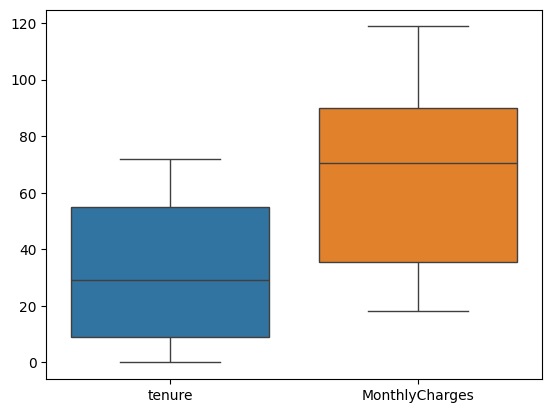

In [9]:
# Checking for outliers
sns.boxplot(data=df[['tenure','MonthlyCharges']])

<Axes: ylabel='TotalCharges'>

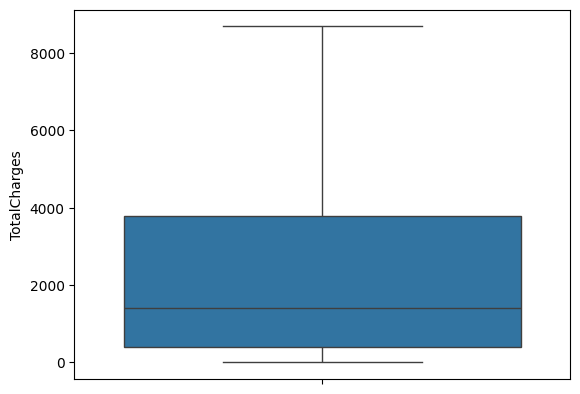

In [10]:
sns.boxplot(data=df['TotalCharges'])

## 4. EDA

When examining the statistical details of the data below, we see the average customer <br>
remains with the company for 32 months with a maximum of 72 months.<br>
We also see the average monthly bill is roughly 65 dollars with a maximum bill of 118.75 dollars.<br>
Lastly, we can observe the average total charges is roughly 2280 dollars with a maximum total bill of 8685 dollars.

In [11]:
# Examining statistical details of numerical attributes
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Examining Target Variable "Churn"

Upon examining the target variable "Churn", we notice that <br>
an alarming 27% of customers leave Telco company for reasons <br>
we will explore in this project.

<Axes: ylabel='count'>

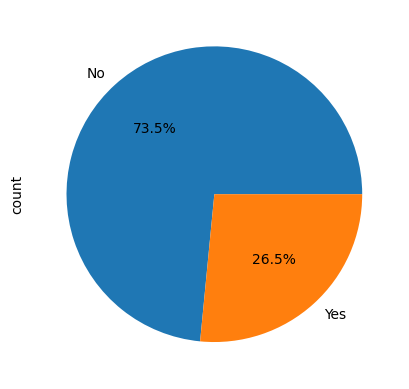

In [12]:
df['Churn'].value_counts().plot(kind="pie",autopct='%1.1f%%')

### Examining Distribution and Churn in Numerical Features

From examining the charts below, we can check the distribution and see how each variable affects churn.


**Tenure:**

<Axes: xlabel='tenure', ylabel='Count'>

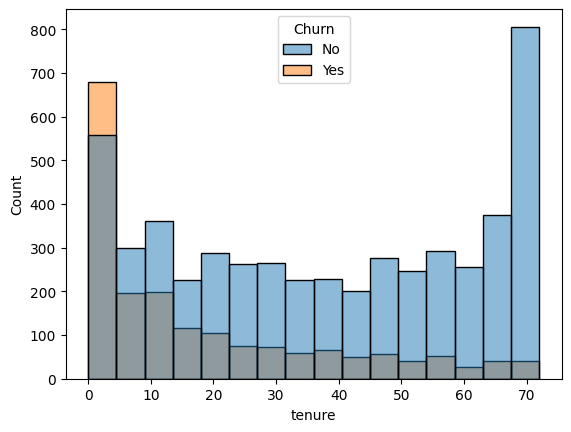

In [13]:
sns.histplot(data=df,x='tenure',hue='Churn')

**Monthly Charges:**

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

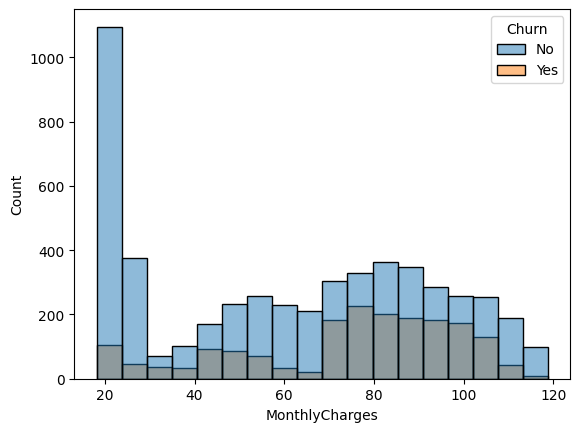

In [14]:
sns.histplot(data=df,x='MonthlyCharges',hue='Churn')

**Total Charges:**

<Axes: xlabel='TotalCharges', ylabel='Count'>

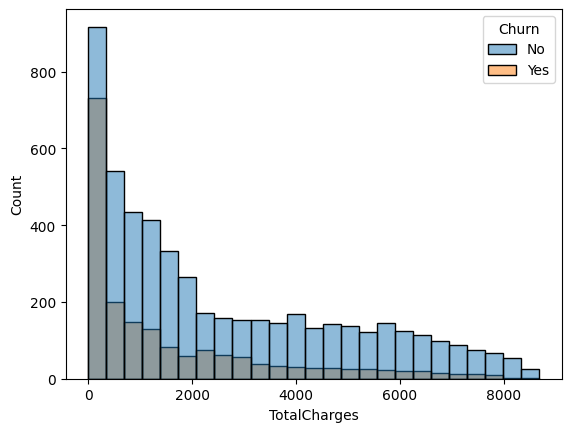

In [15]:
sns.histplot(data=df,x='TotalCharges',hue='Churn')

### Examining Churn in Categorical Features

In [16]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

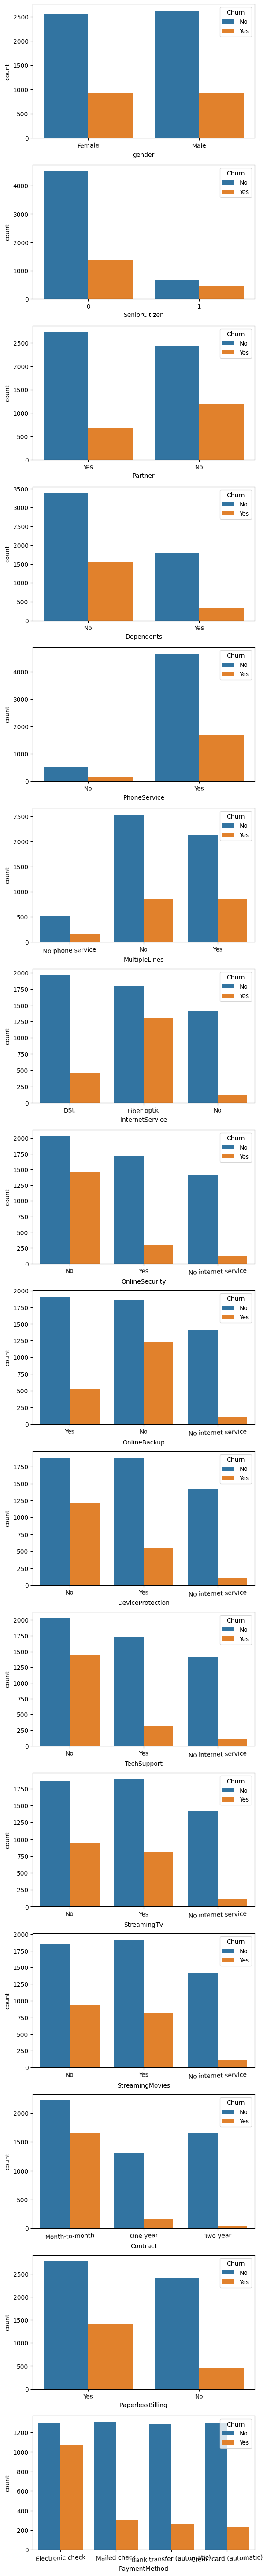

In [17]:
fig, ax = plt.subplots(len(categorical_variables), figsize=(6.5, 75))

for cat, i in zip(categorical_variables, range(len(categorical_variables))):
    countplot = sns.countplot(data=df, x=df[cat],hue='Churn',ax=ax[i])
    plt.setp(countplot.get_xticklabels(), rotation=2)

### Takeaways from Categorical Plots:

- **gender:** Churn rates are identical regardless of gender.
- **SeniorCitizen:** According to the plot, seniors are likelier to churn than non-seniors.
- **Partner:** Singe customers are more likely to churn than partnered subscribers.
- **Dependents:** Churn rates are higher for subscribers without children.
- **PhoneService:** Churn rates are much higher for subscribers that include phone services into their plan.
- **MultipleLines:** Subscribers with multiple lines and those that do not have equal churn rates.
- **InternetService:** Surprisingly, internet subscribers with Fiber Optic service are likely to leave our company.
- **OnlineSecurity:** Churn rates are much higher for internet customers without online security.
- **OnlineBackup/DeviceProtection/TechSupport:** <br>
    Churn rates are also much higher for internet customers without online backup, device protection, technical support services. <br>    
- **StreamingTV/StreamingMovies:** <br>
    Customers who do not use streaming services are more likely to churn a little more than other members who choose our streaming options.
- **PaperlessBilling:** Paperless billing customers have higher churn rates.
- **PaymentMethod:** Electronic checking customers also have higher churn rates.

## Further Preprocessing for ML Preparation

#### Scaling Numerical Variables

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
scaled_df

array([[0.01388889, 0.11542289, 0.00343704],
       [0.47222222, 0.38507463, 0.21756402],
       [0.02777778, 0.35422886, 0.01245279],
       ...,
       [0.15277778, 0.11293532, 0.03989153],
       [0.05555556, 0.55870647, 0.03530306],
       [0.91666667, 0.86965174, 0.78810105]])

Checking summary statistics of scaled variables

In [19]:
scaled_df = pd.DataFrame(scaled_df,columns = ['tenure','MonthlyCharges','TotalCharges'] )
scaled_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


Checking distribution of scaled variable

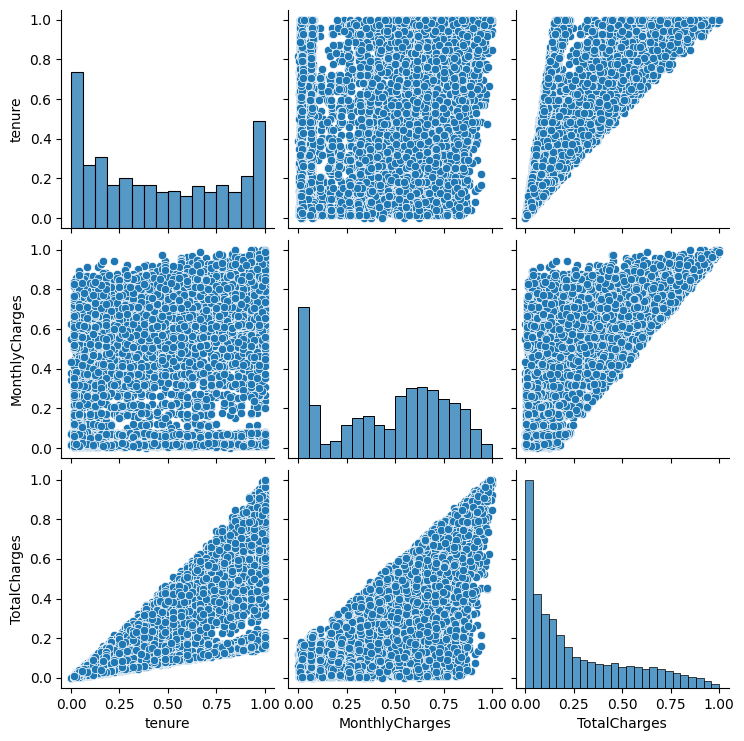

In [20]:
sns.pairplot(scaled_df)

Replacing original numerical variables with scaled variables

In [21]:
df['tenure'] = scaled_df['tenure']
df['MonthlyCharges'] = scaled_df['MonthlyCharges']
df['TotalCharges'] = scaled_df['TotalCharges']

Encoding Categorical Variables

In [22]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']
y = pd.get_dummies(y,drop_first=True)

In [23]:
X

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,0.217564,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.027778,0.354229,0.012453,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.625000,0.239303,0.211951,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0.027778,0.521891,0.017462,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0.229194,True,False,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,1.000000,0.845274,0.847792,False,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0.152778,0.112935,0.039892,False,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,0.055556,0.558706,0.035303,True,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


## ML Models Used

- **Logistic Regression**
- **Random Forest**
- **Gradient Boosting Model (XGBoost)**

### Logistic Regression